## Tutorial on Hedonic Regression

This material uses Python to demonstrate some aspects of hedonic regression. The objective here is not to learn to program, but to understand the hedonic regression methodology.  We begin with an example in which we generate some synthetic data using a set of coefficients and a mathematical model, and learn those coefficients using a statistical method called multiple regression.

The first part of this notebook follows closely the content in the Statsmodels online documentation. We won't try to provide the theoretical basis for regression models here.  You can consult any number of online resources for this, including Wikipedia's explanation of [Ordinary Least Squares Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares). We will be using the Statsmodels library for this ([documentation here](http://statsmodels.sourceforge.net/stable/index.html)).

The statistical model is assumed to be $Y = X\beta + \epsilon$, where $\epsilon\sim N\left(0,\sigma^{2}\Sigma\right)$

Depending on the assumption on $\Sigma$, Statsmodels have currently four classes available

- GLS : generalized least squares for arbitrary covariance $\Sigma$
- OLS : ordinary least squares for i.i.d. errors $\Sigma=\textbf{I}$
- WLS : weighted least squares for heteroskedastic errors $\text{diag}\left  (\Sigma\right)$
- GLSAR : feasible generalized least squares with autocorrelated AR(p) errors $\Sigma=\Sigma\left(\rho\right)$

We focus here on the simple Ordinary Least Squares (OLS) model that is the most widely used, but makes strong assumptions about the errors being indepentently and identically distributed (i.i.d.).  When these conditions are met, the OLS parameter estimates are the Best Linear Unbiased Estimates (BLUE).

More intuitively (perhaps), what linear regression using the OLS estimator attempts to do is find the vector of parameters ($\beta$), such that when you compute a linear function $X\beta$ you generate a predicted array of $\hat{y}$ that, compared to the observed $y$, the squared sum of each observation's error ($\epsilon_{i} = \hat{y}_{i} - y_{i}$) across all the observations ($\Sigma^{2}\epsilon_{i}$), is minimized.

In [1]:
# Startup steps
import pandas as pd, numpy as np, statsmodels.api as sm
import matplotlib.pyplot as plt, matplotlib.cm as cm, matplotlib.font_manager as fm
import matplotlib.mlab as mlab
from scipy.stats import pearsonr, ttest_rel
%matplotlib inline

To introduce concepts, let's begin by defining a hypothetical relationship between a dependent variable $y$ and an explanatory, or independent variable $x$.  

We are only going to explore correlation, but there is an implicit causal story that x is influencing y, and not the other way around.

Let's say we have a relationship in which y is expected to be twice the value of x.  A pretty simple model:
$y = 2x$

Another way to describe this is as a line with an intercept of zero: $y = 0 + 2x$
We will look at it initially with no intercept and then add that in, before going to more than one independent variable.

If we plot the 'model', we can see that at a value of x=0, the intercept is 0, so the value of y will be zero.  And at a value of x=10, the value of y is 2x = 2*10 = 20.

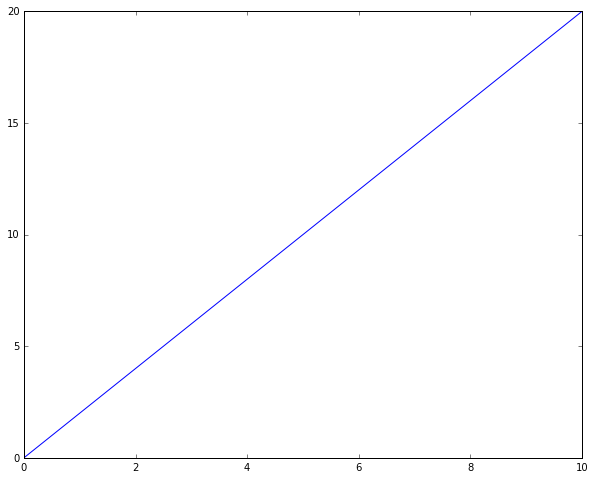

In [2]:
plt.figure(1, figsize=(10,8), )
plt.plot([0, 10], [0, 20])
plt.axis([0, 10, 0, 20])
plt.show();

Now let's try to approximate real world data, in which we might be collecting observations of x and y, with some measurement error.  Let's impose the assumption that the observations will deviate from this line with some randomly distributed error.  We will use the standard assumption that the errors are normally distributed, like a bell curve, as is common.  We can use the equation for the model to generate points that would fall on the line above if there were no error, but we will add random errors to it to demonstrate how regression models work.

Generate data using a model we define:

In [3]:
nsample = 50
x = np.linspace(0, 10, 50)
X = x
beta = np.array([0, 2])
e = np.random.normal(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e

Plot the data as a scatterplot. 

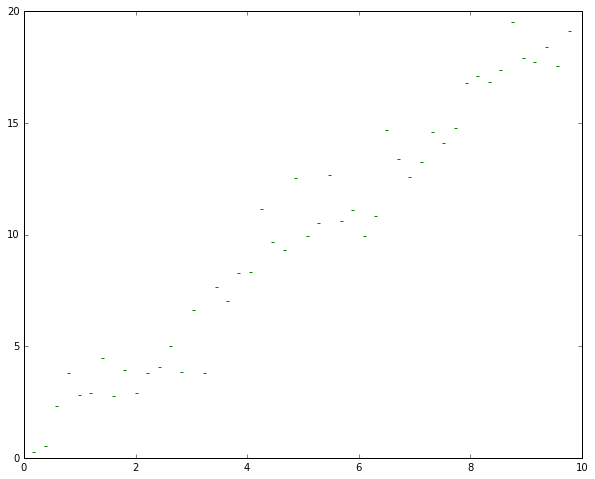

In [4]:
plt.figure(1, figsize=(10,8), )
plt.scatter(x, y, marker=0, s=10, c='g')
plt.axis([0, 10, 0, 20])
plt.show();

Add line based on Intercept = 0, beta = slope of line = 2

Now we can see the original 'model' and the generated observations.  What regression analysis enables is to 'learn' the parameters of a model that most closely approximates the process that generated a set of observations.  In this case, we have a controlled setting, because we generated the data and know the 'true' values of the parameters of the model: intercept = 0, and slope of the line = beta = 2.

Look at the plot below with the line superimposed on the 'observed' (generated) data.  We can intuit that if we tilted the line or shifted it up or down, and calculated the 'errors', or the distance of each point to the line, that the square of their sum would get bigger.  The reason for squaring is that if we didn't, the negative and positive errors would more or less cancel out.  So we can infer that the 'best fit' model parameters would be ones that minimize the sum of the squares errors between the observed data and the y values predicted by the model.

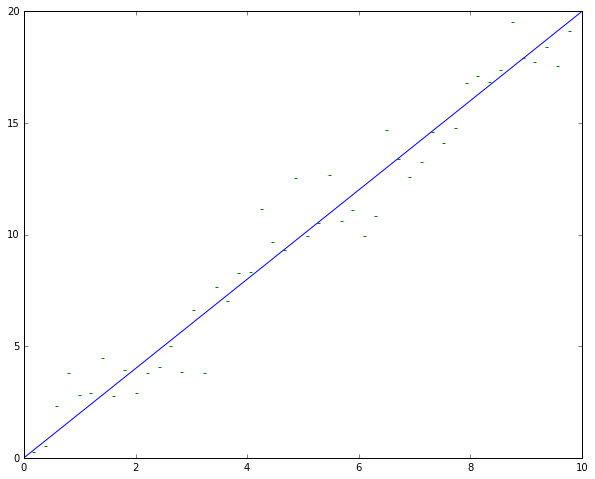

In [5]:
plt.figure(1, figsize=(10,8), )
plt.plot([0, 10], [0, 20])
plt.scatter(x, y, marker=0, s=10, c='g')
plt.axis([0, 10, 0, 20])
plt.show();

Regenerate the data using an intercept = 2

In [6]:
nsample = 20
x = np.linspace(0, 10, 20)
X = x
beta = np.array([2, 2])
e = np.random.normal(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e

### Specifying regression models using design matrices (dmatrices) in statsmodels

To fit most of the models covered by statsmodels, you will need to create two design matrices. The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.). The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.). The OLS coefficient estimates are calculated using linear algebra to find the parameters that minimize the sum of the squared errors:

$$\hat{\beta} = (X'X)^{-1} X'y$$

where $y$ is an $N \times 1$ column of data on sales price. $X$ is $N \times 2$ with an intercept and the x variable.


Run a simple linear regression and compare the coefficients to the ones used to generate the data.

In [7]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     714.4
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           6.13e-16
Time:                        09:46:04   Log-Likelihood:                -27.480
No. Observations:                  20   AIC:                             58.96
Df Residuals:                      18   BIC:                             60.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.2661      0.434      5.218      0.0

In [8]:
print('Parameters: ', results.params)
inter = results.params[0]
beta = results.params[1]
print('Intercept =', inter)
print('Beta = ', beta)
print('Rsquared = ', results.rsquared)

('Parameters: ', array([ 2.26606338,  1.9846515 ]))
('Intercept =', 2.2660633804329802)
('Beta = ', 1.984651495439955)
('Rsquared = ', 0.97542413925618676)


 Rsquared = Explained Variation / Total Variation
 
 Rsquared = 1 - (Unexplained Variation / Total Variation)
 
 Rsquared = 1 – (sum of squared residuals / sum of squared deviation of prices from the mean price)
 

Plot the 'true' line using the original coefficients, and the 'predicted' line, using the estimated coefficients.  Try with smaller and larger samples.

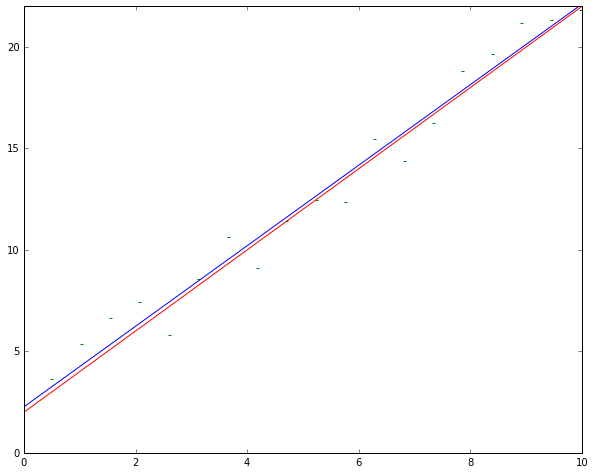

In [9]:
plt.figure(1, figsize=(10,8), )
plt.plot([0, 10], [2, 22], c='r')
plt.plot([0,10], [inter,(inter+10*beta)], c='b')
plt.scatter(x, y, marker=0, s=10, c='g')
plt.axis([0, 10, 0, 22])
plt.show();

## Now on to some real data and Hedonic Regression

We will use a large sample of single family housing sales from the San Francisco Bay Area to estimate a linear regression model in which the dependent variable $y$ is the price of a house at the time of sale, and $X$ is a set of exogenous, or explanatory variables.

What exactly does this give us?  A statistical way to figure out what the component amenities in a house are worth, if you could buy them *a la carte*.  Another way to think of it is, how much do house buyers in the Bay Area during this period pay, on average, for an additional unit of each amenity: square foot of living space, bedroom, bathroom, etc.

Here we use the sales transactions in San Francisco over a month from early-February through early-March.

First we load the data from a csv file.  Then we rename columns to make the data easier to work with.

In [10]:
sf = pd.read_csv('data/redfin_2017-03-05-17-45-34-san-francisco-county-1-month.csv')
sf.columns

Index([u'SALE TYPE', u'SOLD DATE', u'PROPERTY TYPE', u'ADDRESS', u'CITY',
       u'STATE', u'ZIP', u'PRICE', u'BEDS', u'BATHS', u'LOCATION',
       u'SQUARE FEET', u'LOT SIZE', u'YEAR BUILT', u'DAYS ON MARKET',
       u'$/SQUARE FEET', u'HOA/MONTH', u'STATUS',
       u'NEXT OPEN HOUSE START TIME', u'NEXT OPEN HOUSE END TIME',
       u'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       u'SOURCE', u'MLS#', u'FAVORITE', u'INTERESTED', u'LATITUDE',
       u'LONGITUDE'],
      dtype='object')

In [11]:
sf1 = sf.rename(index=str, columns={'SALE TYPE': 'saletype',
    'SOLD DATE': 'solddate', 'PROPERTY TYPE': 'proptype', 'ADDRESS': 'address',
    'CITY': 'city', 'STATE': 'state', 'ZIP': 'zip', 'PRICE': 'price', 'BEDS': 'beds',
    'BATHS': 'baths', 'LOCATION': 'location', 'SQUARE FEET': 'sqft', 'LOT SIZE': 'lotsize',
    'YEAR BUILT': 'yrbuilt', 'DAYS ON MARKET': 'daysonmkt', '$/SQUARE FEET': 'pricesqft',
    'LATITUDE': 'latitude', 'LONGITUDE': 'longitude', 'HOA/MONTH': 'hoamonth',
    'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)': 'url',
    'STATUS': 'status', 'NEXT OPEN HOUSE START TIME': 'nextopenstart', 'NEXT OPEN HOUSE END TIME': 'nextopenend',
    'SOURCE': 'source', 'MLS#': 'mls', 'FAVORITE': 'favorite', 'INTERESTED': 'interested'
    })

sf1.head()

,saletype,solddate,proptype,address,city,state,zip,price,beds,baths,...,status,nextopenstart,nextopenend,url,source,mls,favorite,interested,latitude,longitude
0,PAST SALE,February-7-2017,Single Family Residential,521 Cayuga Ave,San Francisco,CA,94112.0,1200000.0,2.0,1.25,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/521-Cay...,San Francisco MLS,453167,N,Y,37.728860,-122.435308
1,PAST SALE,February-10-2017,Condo/Co-op,95 Red Rock Way Unit 105M,San Francisco,CA,94131.0,590000.0,0.0,1.00,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/95-Red-...,San Francisco MLS,452726,N,Y,37.746324,-122.441517
2,PAST SALE,February-10-2017,Single Family Residential,3157 Baker St,San Francisco,CA,94123.0,3260000.0,5.0,3.50,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/3157-Ba...,San Francisco MLS,451943,N,Y,37.800218,-122.446455
3,PAST SALE,February-17-2017,Single Family Residential,2594 San Jose Ave,San Francisco,CA,94112.0,920000.0,3.0,2.00,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/2594-Sa...,MetroList,16067859,N,Y,37.716435,-122.450444
4,PAST SALE,February-27-2017,Single Family Residential,130 Brazil Ave,SAN FRANCISCO,CA,94112.0,790000.0,2.0,1.00,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/130-Bra...,MLSListings,ML81635907,N,Y,37.723920,-122.433735


In [12]:
sf1.describe()

,zip,price,beds,baths,sqft,lotsize,yrbuilt,daysonmkt,pricesqft,hoamonth,nextopenstart,nextopenend,latitude,longitude
count,308.000000,3.080000e+02,301.000000,293.000000,266.000000,139.000000,288.000000,306.00000,264.000000,159.000000,0.0,0.0,309.000000,309.000000
mean,93888.253247,1.521055e+06,2.647841,1.880546,1662.593985,3194.935252,1952.006944,14.30719,949.905303,543.874214,NaN,NaN,37.760820,-122.431289
std,2820.378426,1.063400e+06,1.862499,0.896519,1169.031917,4656.050424,39.950230,8.87308,279.135062,436.562243,NaN,NaN,0.025052,0.027834
min,59059.000000,3.500000e+03,0.000000,1.000000,300.000000,611.000000,1885.000000,2.00000,339.000000,4.000000,NaN,NaN,37.709249,-122.510730
25%,94109.000000,8.787500e+05,2.000000,1.000000,978.750000,2319.500000,1916.750000,6.00000,773.750000,342.500000,NaN,NaN,37.739065,-122.443876
50%,94114.000000,1.271000e+06,2.000000,2.000000,1360.000000,2513.000000,1941.000000,12.00000,963.500000,473.000000,NaN,NaN,37.762549,-122.428527
75%,94122.000000,1.813750e+06,3.000000,2.000000,1904.750000,3090.000000,1996.000000,23.00000,1106.000000,683.000000,NaN,NaN,37.781520,-122.412238
max,94158.000000,1.025000e+07,18.000000,5.500000,9504.000000,56024.000000,2017.000000,30.00000,2053.000000,4413.000000,NaN,NaN,37.805816,-122.371007


### Here is a scatterplot of sqft and price

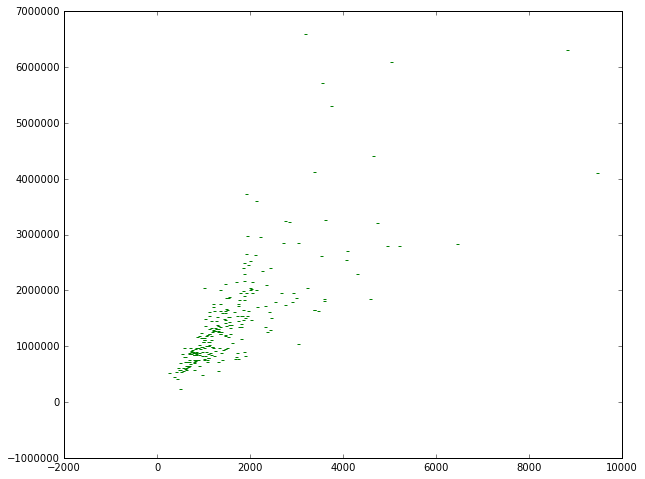

In [13]:
plt.figure(1, figsize=(10,8), )
plt.scatter(sf1['sqft'], sf1['price'], marker=0, s=10, c='g')
#plt.axis([12, 16, 12, 16])
plt.show();

### Here is a scatterplot of beds and price

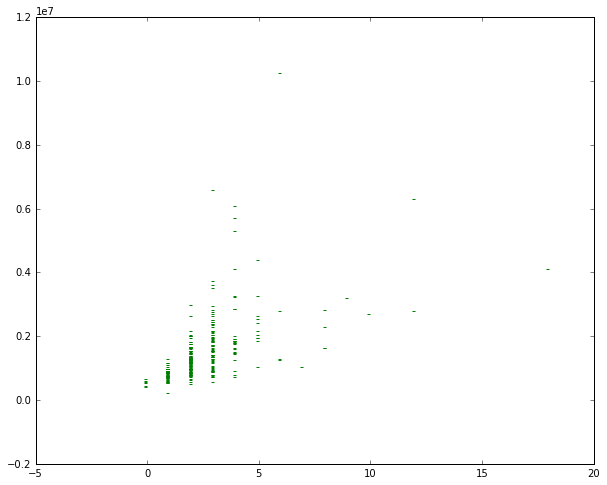

In [14]:
plt.figure(1, figsize=(10,8), )
plt.scatter(sf1['beds'], sf1['price'], marker=0, s=10, c='g')
#plt.axis([12, 16, 12, 16])
plt.show();

### Evaluating correlations among multiple variables and price
What if we want to know how price is affected by both sqft and beds, and other variables as well?  We would generally use multiple regression.

## Recoding variables

Sometimes variables have larger values than you intend to use. You can either drop those records, or recode the data so that values above some limit are capped at that limit.

In [15]:
sf1['beds4'] = sf1['beds']
sf1['baths4'] = sf1['baths']

In [16]:
sf1.describe()

,zip,price,beds,baths,sqft,lotsize,yrbuilt,daysonmkt,pricesqft,hoamonth,nextopenstart,nextopenend,latitude,longitude,beds4,baths4
count,308.000000,3.080000e+02,301.000000,293.000000,266.000000,139.000000,288.000000,306.00000,264.000000,159.000000,0.0,0.0,309.000000,309.000000,301.000000,293.000000
mean,93888.253247,1.521055e+06,2.647841,1.880546,1662.593985,3194.935252,1952.006944,14.30719,949.905303,543.874214,NaN,NaN,37.760820,-122.431289,2.647841,1.880546
std,2820.378426,1.063400e+06,1.862499,0.896519,1169.031917,4656.050424,39.950230,8.87308,279.135062,436.562243,NaN,NaN,0.025052,0.027834,1.862499,0.896519
min,59059.000000,3.500000e+03,0.000000,1.000000,300.000000,611.000000,1885.000000,2.00000,339.000000,4.000000,NaN,NaN,37.709249,-122.510730,0.000000,1.000000
25%,94109.000000,8.787500e+05,2.000000,1.000000,978.750000,2319.500000,1916.750000,6.00000,773.750000,342.500000,NaN,NaN,37.739065,-122.443876,2.000000,1.000000
50%,94114.000000,1.271000e+06,2.000000,2.000000,1360.000000,2513.000000,1941.000000,12.00000,963.500000,473.000000,NaN,NaN,37.762549,-122.428527,2.000000,2.000000
75%,94122.000000,1.813750e+06,3.000000,2.000000,1904.750000,3090.000000,1996.000000,23.00000,1106.000000,683.000000,NaN,NaN,37.781520,-122.412238,3.000000,2.000000
max,94158.000000,1.025000e+07,18.000000,5.500000,9504.000000,56024.000000,2017.000000,30.00000,2053.000000,4413.000000,NaN,NaN,37.805816,-122.371007,18.000000,5.500000


Since the maximum bedrooms is 18 and the maximum bathrooms is 5.5, let's create a recoded version of these to cap the maximum value at 4 for each.

In [17]:
#sf1.loc[:,'beds4'][sf1['beds']>3] =  4
#sf1.loc[:,'baths4'][sf1['baths']>3] =  4
sf1.loc[sf1.beds > 3, 'beds4'] =  4
sf1.loc[sf1.baths > 3, 'baths4'] =  4

sf1.describe()

,zip,price,beds,baths,sqft,lotsize,yrbuilt,daysonmkt,pricesqft,hoamonth,nextopenstart,nextopenend,latitude,longitude,beds4,baths4
count,308.000000,3.080000e+02,301.000000,293.000000,266.000000,139.000000,288.000000,306.00000,264.000000,159.000000,0.0,0.0,309.000000,309.000000,301.000000,293.000000
mean,93888.253247,1.521055e+06,2.647841,1.880546,1662.593985,3194.935252,1952.006944,14.30719,949.905303,543.874214,NaN,NaN,37.760820,-122.431289,2.385382,1.875427
std,2820.378426,1.063400e+06,1.862499,0.896519,1169.031917,4656.050424,39.950230,8.87308,279.135062,436.562243,NaN,NaN,0.025052,0.027834,1.034884,0.868154
min,59059.000000,3.500000e+03,0.000000,1.000000,300.000000,611.000000,1885.000000,2.00000,339.000000,4.000000,NaN,NaN,37.709249,-122.510730,0.000000,1.000000
25%,94109.000000,8.787500e+05,2.000000,1.000000,978.750000,2319.500000,1916.750000,6.00000,773.750000,342.500000,NaN,NaN,37.739065,-122.443876,2.000000,1.000000
50%,94114.000000,1.271000e+06,2.000000,2.000000,1360.000000,2513.000000,1941.000000,12.00000,963.500000,473.000000,NaN,NaN,37.762549,-122.428527,2.000000,2.000000
75%,94122.000000,1.813750e+06,3.000000,2.000000,1904.750000,3090.000000,1996.000000,23.00000,1106.000000,683.000000,NaN,NaN,37.781520,-122.412238,3.000000,2.000000
max,94158.000000,1.025000e+07,18.000000,5.500000,9504.000000,56024.000000,2017.000000,30.00000,2053.000000,4413.000000,NaN,NaN,37.805816,-122.371007,4.000000,4.000000


### Now let's estimate a series of models using the sales data.

Here we specify models using R syntax.  This uses the patsy language
See http://patsy.readthedocs.org/en/latest/ for complete documentation

In [18]:
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
y, X = dmatrices('np.log(price) ~ np.log(sqft) + beds + baths', 
                 data=sf1, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     236.4
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           8.26e-73
Time:                        09:46:41   Log-Likelihood:                -16.926
No. Observations:                 255   AIC:                             41.85
Df Residuals:                     251   BIC:                             56.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        7.5064      0.401     18.727   

### Experiment with the log transformations and practice interpretation

Most hedonic regression models use a log-transformation of the dependent variable (price), by taking the logarithm of the price of each sale and using it as the dependent variable.  It changes the interpretation of the coefficients.  If the variable on the right hand side is untransformed (in its original scale) and the dependent variable is log-transformed, then one unit increase in the right hand side variable is predicted to increase the price of a house by the percentage indicated by the coefficient.  If the right hand side variable is also log transformed, then the interpretation is one percent change in the independent variable is associated with the percentage change in the dependent variable indicated by the coefficient.  If neither is transformed, then the coefficient indicates the dollar amount of change in price expected from a one unit change in the independent variable.

### How well the does model fit the data?

The errors appear to be normally distributed - with half having positive errors and half having negative errors, and the mean value being zero.  This is one indicator of whether the model is inacurate (statistically biased).

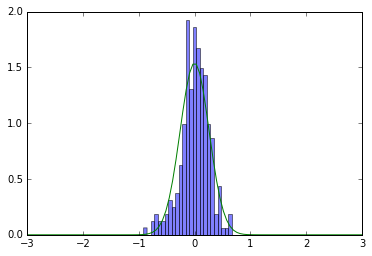

In [19]:
plt.hist(residuals, bins=25, normed=True, alpha=.5)
mu = residuals.mean()
variance = residuals.var()
sigma = residuals.std()
x = np.linspace(-3, 3, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma));

Another way to look at these results is to plot the errors against the range of the y variable, to see if the errors appear to be higher at one end of the range of y or the other.  It seems to be fairly uniform across the scale of y.

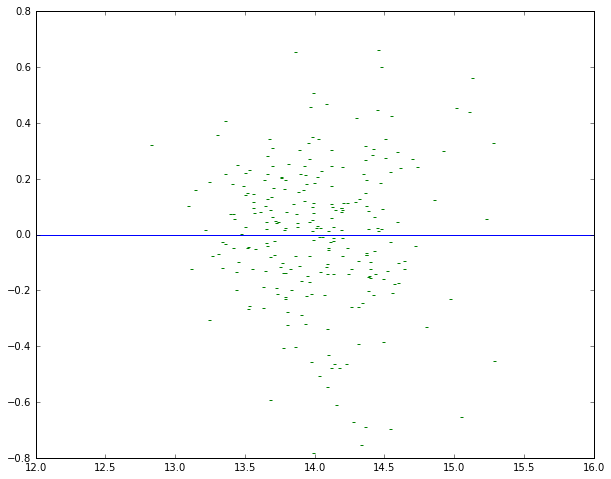

In [20]:
plt.figure(1, figsize=(10,8), )
plt.plot([12, 16], [0, 0], c='b')
plt.scatter(predicted, residuals, marker=0, s=10, c='g');
plt.axis([12, 16, -0.8, 0.8])
plt.show();

The next plot compares observed values on the x axis to predicted values from the model on the y axis. 

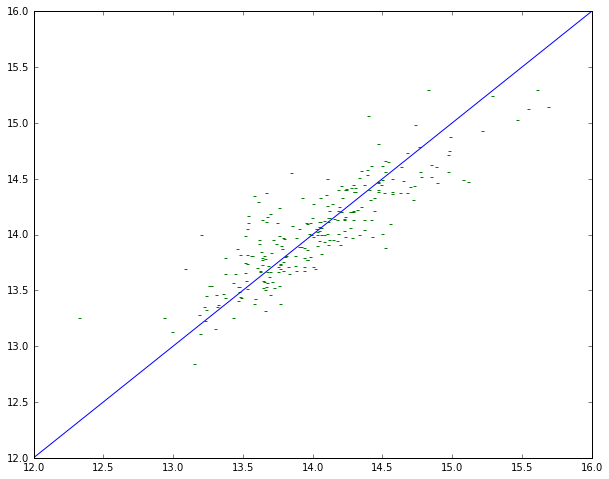

In [21]:
plt.figure(1, figsize=(10,8), )
plt.plot([12, 16], [12, 16])
plt.scatter(observed, predicted, marker=0, s=10, c='g')
plt.axis([12, 16, 12, 16])
plt.show();